In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.stats

In [91]:
with open('data/sim2_data_trial2.pkl','rb') as file:
    data = pickle.load(file)

In [92]:
font = {'family' : 'Helvetica Neue',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

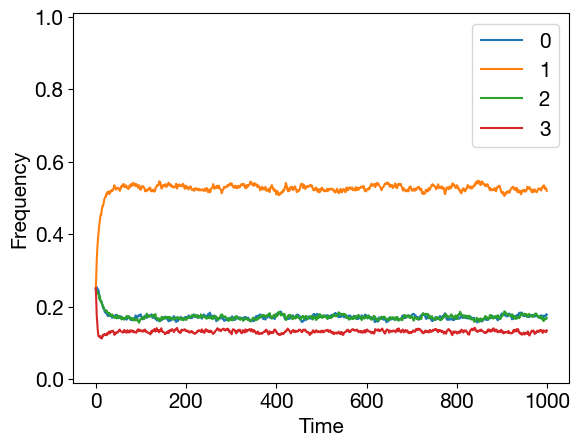

In [93]:
plt.plot(data['freq_timeseries'].T)
plt.ylim(-0.01,1.01)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend(np.arange(4))

In [96]:
np.mean(data['freq_timeseries'][:,200:],axis=1)

array([0.17071438, 0.52670725, 0.17103225, 0.13154613])

In [95]:
print(sum(data['freq_timeseries'][:,-1]))

0.9999999999999999
